In [ ]:
import os
import numpy as np
import pandas as pd
from SALib.analyze.sobol import analyze
from SALib.sample.sobol import sample as sobol_sample
from SALib.analyze.sobol import analyze as sobol_analyze
import matplotlib.pyplot as plt
from SALib.analyze.sobol import analyze
import numpy as np
import json
from SALib.sample import saltelli
from SALib.analyze import sobol
import autoemulate
from SA

In [59]:
# Load them back
n_samples = 32768
simulation_out_path = f'outputs/simulations/output_{n_samples}_samples_no_failures/'

with open(os.path.join(simulation_out_path,"bool_indices.json"), 'r') as f:
    bool_indices = json.load(f)

- load input_256_samples.csv
- load simulation_summary.csv 

Get rid of those rows in input_256_camples that correspond to bool_indices

In [60]:
# Load input_32768_samples.csv
input_csv = os.path.join(simulation_out_path, "input_samples_32768.csv")
X = pd.read_csv(input_csv)
print("Loaded input samples:", X.shape)

# Load simulation_summary.csv
summary_csv = os.path.join(simulation_out_path, "simulations_summary.csv")
Y = pd.read_csv(summary_csv)
print("Loaded simulation summary:", Y.shape)

Loaded input samples: (32768, 35)
Loaded simulation summary: (32768, 32)


In [61]:
# make x and y 32300 rows long 

In [62]:
# Lets get cleaning and removing 

# Take only the columns up to column 'T' 
#t_column_index = X.columns.get_loc('T')
#X = X.iloc[:, :t_column_index + 1]

# Remove rows at the indices in bool_indices
#X_cleaned = X.drop(index=bool_indices).reset_index(drop=True)
#print("Cleaned input samples:", X_cleaned.shape)  # Should be (255, 35)

In [63]:
# Generate random 128 indices between 0-255
#random_indices = np.random.choice(X_cleaned.index, size=32300, replace=False)

# Select the rows at these indices
#X_random = X_cleaned.loc[random_indices].reset_index(drop=True)

# do the same for Y
#Y_random = Y.loc[random_indices].reset_index(drop=True)

In [64]:
parameter_names = list(X.columns)
parameter_bounds = []
for name in parameter_names:
    min_val = X[name].min()
    max_val = X[name].max()
    parameter_bounds.append([min_val, max_val])

problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': parameter_bounds
}
print(problem)



{'num_vars': 35, 'names': ['ao.r', 'ao.c', 'art.r', 'art.c', 'ven.r', 'ven.c', 'av.r', 'mv.r', 'la.E_pas', 'la.E_act', 'la.v_ref', 'la.k_pas', 'lv.E_pas', 'lv.E_act', 'lv.v_ref', 'lv.k_pas', 'ao.l', 'ao.v_ref', 'art.l', 'art.v_ref', 'ven.l', 'ven.v_ref', 'la.v', 'la.delay', 'la.t_tr', 'la.tau', 'la.t_max', 'lv.delay', 'lv.t_tr', 'lv.tau', 'lv.t_max', 'T', 'ao.v', 'art.v', 'ven.v'], 'bounds': [[195.00021708197892, 324.9973548203707], [0.2250017472077161, 0.3749964414630085], [843.7623182544485, 1406.2436742824502], [2.250003429595381, 3.749993302859366], [6.750097083393484, 11.249931440223008], [84.97529677175916, 141.62485116566532], [4.500009032897651, 7.499915971420705], [3.0750127668958154, 5.124973660521209], [0.2250001633074134, 0.3749956074636429], [0.4125003933906555, 0.6874947665724903], [6.750109019223601, 11.24991836026311], [0.0166516540822573, 0.0749994829294737], [0.7500127693638206, 1.249993450473994], [2.250042258761823, 3.7499782755039632], [7.500064778141677, 12.499875

In [65]:
output_feature = "v_lv_mean"  # Change to any column name in Y
Y_feature = Y_1[output_feature].values  # .values converts to numpy array.
Y_feature.shape

(32300,)

In [66]:
# Sensitivity analysis with S1 and ST only

output_feature = "v_lv_mean"  # Change to any column name in Y

Y_feature = Y[output_feature].values  # .values converts to numpy array.

# Run Sobol sensitivity analysis WITHOUT second-order indices
sobol_indices = sobol_analyze(problem, Y_feature, calc_second_order=False)

# Create results directory
results_dir = f"results/sensitivity_{output_feature}"
os.makedirs(results_dir, exist_ok=True)

# Save S1 results
S1_df = pd.DataFrame(sobol_indices['S1'], index=problem['names'], columns=['S1'])
S1_df.sort_values('S1', inplace=True, ascending=False)
S1_df.to_csv(f'{results_dir}/s1_{n_samples}.csv')

# Save ST results  
ST_df = pd.DataFrame(sobol_indices['ST'], index=problem['names'], columns=['ST'])
ST_df.sort_values('ST', inplace=True, ascending=False)
ST_df.to_csv(f'{results_dir}/st_{n_samples}.csv')

# Save ST cumulative sum
ST_cumsum = ST_df.cumsum() / ST_df.cumsum().iloc[-1]
ST_cumsum.to_csv(f'{results_dir}/st_cumsum_{n_samples}.csv')

print(f"Results saved to {results_dir}/")
print(f"- S1 indices: s1_{n_samples}.csv")
print(f"- ST indices: st_{n_samples}.csv") 
print(f"- ST cumulative: st_cumsum_{n_samples}.csv")

/Users/syonis/project/comparative-gsa/venv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

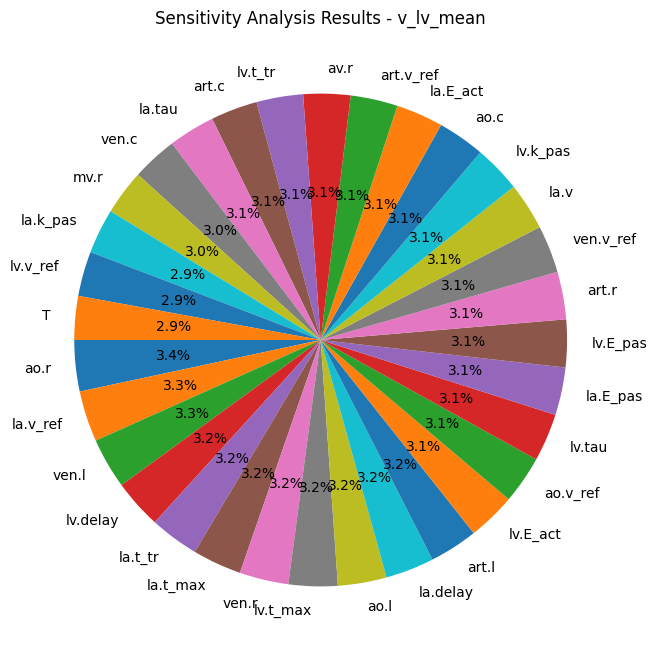

Top 3 parameters: ['ao.r', 'la.v_ref', 'ven.l']
ST values: [1.07150931 1.06662341 1.06269708]


In [ ]:
import matplotlib.pyplot as plt

# Create pie chart like in the tutorial
labels = ST_df.index
sizes = ST_df['ST']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
plt.title(f'Sensitivity Analysis Results - {output_feature}')
plt.show()

# Simple summary using DataFrame
print(f"Top 3 parameters: {ST_df.index[:3].tolist()}")
print(f"ST values: {ST_df['ST'].iloc[:3].values}")

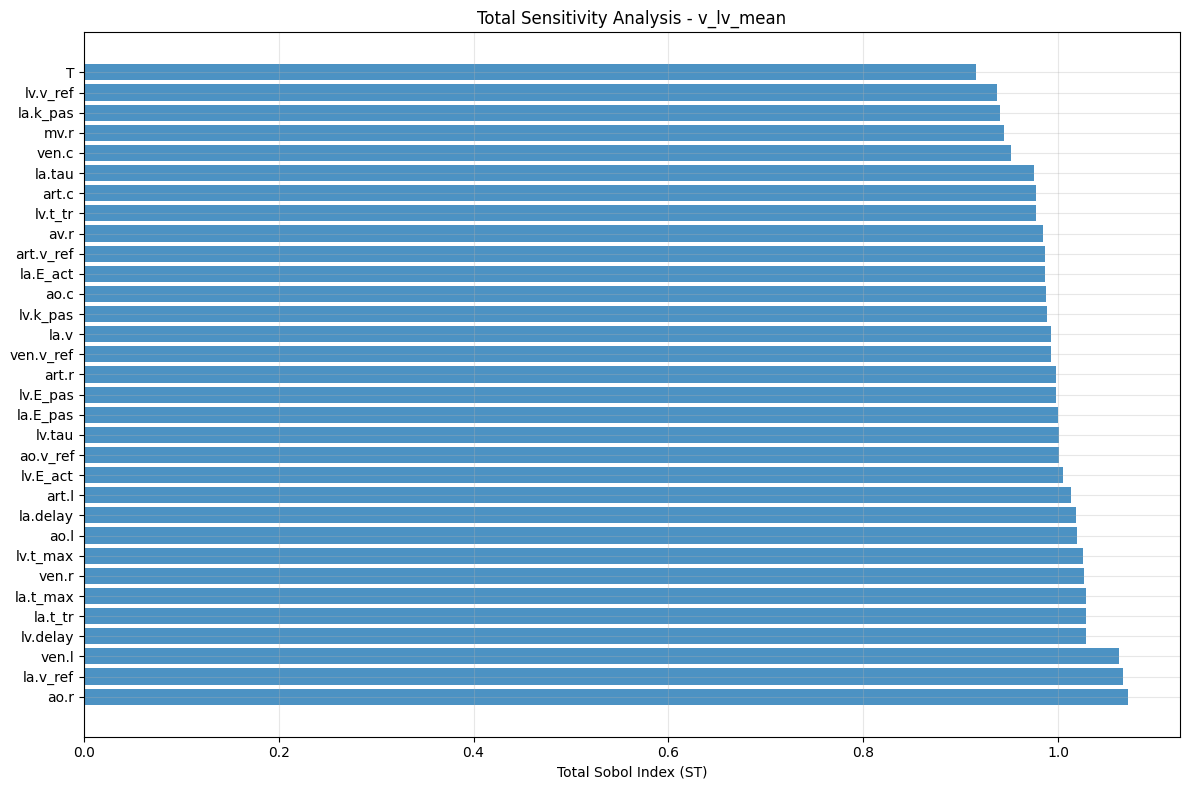

Highest ST parameter: ao.r = 1.072
Lowest ST parameter: T = 0.916


In [ ]:
import matplotlib.pyplot as plt

# Simple ST bar chart using the DataFrame
plt.figure(figsize=(12, 8))

# Create horizontal bar chart of ST values from the sorted DataFrame
y_pos = np.arange(len(ST_df))
plt.barh(y_pos, ST_df['ST'].values, color='#1f77b4', alpha=0.8)

plt.yticks(y_pos, ST_df.index)
plt.xlabel('Total Sobol Index (ST)')
plt.title(f'Total Sensitivity Analysis - {output_feature}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Simple summary
print(f"Highest ST parameter: {ST_df.index[0]} = {ST_df['ST'].iloc[0]:.3f}")
print(f"Lowest ST parameter: {ST_df.index[-1]} = {ST_df['ST'].iloc[-1]:.3f}")

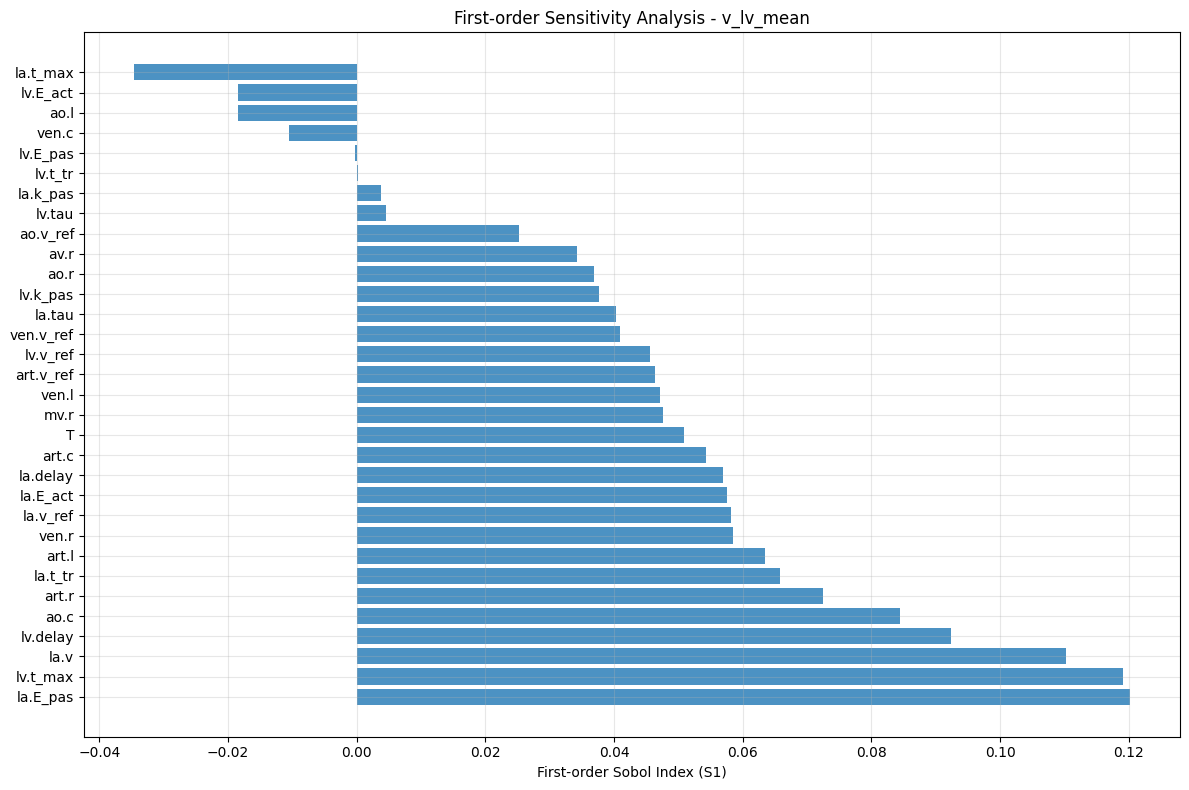

Highest S1 parameter: la.E_pas = 0.120
Lowest S1 parameter: la.t_max = -0.035


In [ ]:
import matplotlib.pyplot as plt

# Simple S1 bar chart using the DataFrame
plt.figure(figsize=(12, 8))

# Create horizontal bar chart of S1 values from the sorted DataFrame
y_pos = np.arange(len(S1_df))
plt.barh(y_pos, S1_df['S1'].values, color='#1f77b4', alpha=0.8)

plt.yticks(y_pos, S1_df.index)
plt.xlabel('First-order Sobol Index (S1)')
plt.title(f'First-order Sensitivity Analysis - {output_feature}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Simple summary
print(f"Highest S1 parameter: {S1_df.index[0]} = {S1_df['S1'].iloc[0]:.3f}")
print(f"Lowest S1 parameter: {S1_df.index[-1]} = {S1_df['S1'].iloc[-1]:.3f}")